## Section-2: Tensor Operations Fundamentals

### **Tensor Transposition**

**Tensor Transposition** is the process of rearranging (or permuting) the axes/dimensions of a tensor.

It’s the higher-dimensional generalization of **matrix transposition**.

---

### 1. **Matrix Transposition (2D case)**

* A **matrix** is a 2D tensor with shape `(rows, columns)`.
* Transposing swaps its two dimensions:

  $$
  A^T_{ij} = A_{ji}
  $$

  If $A$ has shape $(m, n)$, then $A^T$ has shape $(n, m)$.

Example:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}^T
=
\begin{bmatrix}
1 & 4 \\
2 & 5 \\
3 & 6
\end{bmatrix}
$$

---

### 2. **Tensor Transposition (n-D case)**

* A **tensor** can have more than 2 dimensions, e.g., 3D: `(depth, height, width)` or `(channels, height, width)`.
* **Tensor transposition** means **reordering the dimensions** in a specified way.
* In notation, this is often called **permutation of axes**.

If $T$ has shape `(D₁, D₂, D₃)`, then:

* A transpose with order `(1, 0, 2)` swaps the first two axes.
* A transpose with order `(2, 0, 1)` moves the last axis to the front.

Mathematically, for a tensor $A$ with components $A_{i_1, i_2, \dots, i_n}$:

$$
\text{transpose}(A, \text{perm})_{j_1, j_2, \dots, j_n} = A_{i_{\text{perm}(1)}, i_{\text{perm}(2)}, \dots, i_{\text{perm}(n)}}
$$

where `perm` is the permutation order.

---

### 3. **Example**

Suppose $T$ has shape `(2, 3, 4)`:

* Original axes: `(0, 1, 2)` → shape `(2, 3, 4)`
* After `transpose(1, 0, 2)` → shape `(3, 2, 4)`
* After `transpose(2, 1, 0)` → shape `(4, 3, 2)`

In **NumPy**:

```python
import numpy as np

T = np.random.randint(0, 10, (2, 3, 4))
T1 = np.transpose(T, (1, 0, 2))  # swap axes 0 and 1
print(T.shape)   # (2, 3, 4)
print(T1.shape)  # (3, 2, 4)
```

---

### 4. **Why Tensor Transposition is Important**

* **Deep Learning**: Changing data layout for operations (e.g., `channels_first` ↔ `channels_last` in CNNs).
* **Linear Algebra**: Converting between row-major and column-major forms.
* **Data Manipulation**: Preparing tensors for broadcasting, concatenation, or reshaping.
* **Performance Optimization**: Some hardware prefers specific memory layouts.

### 1. Matrix Transposition (2D Tensor)

In [1]:
# Numpy
import numpy as np

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6]])

print("Original (NumPy):\n", A)
print("Transpose (NumPy):\n", A.T)

Original (NumPy):
 [[1 2 3]
 [4 5 6]]
Transpose (NumPy):
 [[1 4]
 [2 5]
 [3 6]]


In [3]:
# PyTorch
import torch

In [4]:
B = torch.tensor([[1, 2, 3], [4, 5, 6]])

print("Original (PyTorch):\n", B)
print("Transpose (PyTorch):\n", B.T)   # or torch.transpose(B, 0, 1)

Original (PyTorch):
 tensor([[1, 2, 3],
        [4, 5, 6]])
Transpose (PyTorch):
 tensor([[1, 4],
        [2, 5],
        [3, 6]])


### 2. Swap Axes in a 3D Tensor

In [5]:
# NumPy
T = np.random.randint(0, 10, (2, 3, 4))
print(T)
print("Shape before:", T.shape)

[[[4 1 8 1]
  [2 8 3 8]
  [2 4 1 7]]

 [[8 9 8 4]
  [1 8 5 0]
  [2 0 4 5]]]
Shape before: (2, 3, 4)


In [6]:
T1 = np.transpose(T, (1, 0, 2))  # swap axis 0 and 1
print(T1)
print("Shape after (NumPy):", T1.shape)

[[[4 1 8 1]
  [8 9 8 4]]

 [[2 8 3 8]
  [1 8 5 0]]

 [[2 4 1 7]
  [2 0 4 5]]]
Shape after (NumPy): (3, 2, 4)


In [7]:
# PyTorch
T_torch = torch.randint(0, 10, (2, 3, 4))
print(T_torch)
print("Shape before:", T_torch.shape)

tensor([[[7, 3, 7, 5],
         [9, 9, 9, 0],
         [4, 8, 7, 4]],

        [[0, 6, 1, 6],
         [3, 2, 0, 5],
         [6, 4, 4, 5]]])
Shape before: torch.Size([2, 3, 4])


In [8]:
T1_torch = T_torch.permute(1, 0, 2)  # same operation
print(T1_torch)
print("Shape after (PyTorch):", T1_torch.shape)

tensor([[[7, 3, 7, 5],
         [0, 6, 1, 6]],

        [[9, 9, 9, 0],
         [3, 2, 0, 5]],

        [[4, 8, 7, 4],
         [6, 4, 4, 5]]])
Shape after (PyTorch): torch.Size([3, 2, 4])


### 3. Moving Last Axis to First (Channel Conversion)

In [9]:
# NumPy
img = np.random.rand(32, 32, 3)   # HWC (Height, Width, Channels)
chw_img = np.transpose(img, (2, 0, 1))  # to CHW
print("NumPy shape:", img.shape, "->", chw_img.shape)

NumPy shape: (32, 32, 3) -> (3, 32, 32)


In [10]:
# PyTorch
img_torch = torch.rand(32, 32, 3)  # HWC
chw_img_torch = img_torch.permute(2, 0, 1)  # to CHW
print("PyTorch shape:", img_torch.shape, "->", chw_img_torch.shape)

PyTorch shape: torch.Size([32, 32, 3]) -> torch.Size([3, 32, 32])


### 4. Batch of Matrices Transpose (4D Tensor)

In [11]:
# NumPy
batch = np.random.rand(10, 28, 28, 1)  # (batch, H, W, C)
batch_T = np.transpose(batch, (0, 3, 1, 2))  # (batch, C, H, W)
print("NumPy shape:", batch.shape, "->", batch_T.shape)

NumPy shape: (10, 28, 28, 1) -> (10, 1, 28, 28)


In [12]:
# PyTorch
batch_torch = torch.rand(10, 28, 28, 1)
batch_T_torch = batch_torch.permute(0, 3, 1, 2)
print("PyTorch shape:", batch_torch.shape, "->", batch_T_torch.shape)

PyTorch shape: torch.Size([10, 28, 28, 1]) -> torch.Size([10, 1, 28, 28])


### 5. Swapping Two Specific Dimensions in a Higher Tensor

In [13]:
# NumPy
X = np.random.rand(4, 5, 6, 7)
X_swap = np.swapaxes(X, 1, 2)  # swap axis-1 and axis-2
print("NumPy shape:", X.shape, "->", X_swap.shape)

NumPy shape: (4, 5, 6, 7) -> (4, 6, 5, 7)


In [14]:
# PyTorch
X_torch = torch.rand(4, 5, 6, 7)
X_swap_torch = torch.transpose(X_torch, 1, 2)  # swap dim-1 and dim-2
print("PyTorch shape:", X_torch.shape, "->", X_swap_torch.shape)

PyTorch shape: torch.Size([4, 5, 6, 7]) -> torch.Size([4, 6, 5, 7])


# **Introduction to Basic Tensor Arithmetical Properties**

Tensors are the fundamental data structures used in modern scientific computing, machine learning, and deep learning. A tensor can be thought of as a generalized form of scalars, vectors, and matrices that can extend to any number of dimensions. Since they generalize familiar mathematical objects, tensors naturally inherit a rich set of **arithmetical properties**.

Just as numbers, vectors, and matrices follow certain arithmetic rules—such as commutativity of addition, distributivity of multiplication, and the existence of identity elements—tensors also obey these properties. Understanding these rules is important because they guarantee consistency when performing operations like tensor addition, scalar multiplication, elementwise multiplication, and transposition. These properties form the **building blocks** for more advanced concepts in linear algebra, numerical computation, and deep learning frameworks like NumPy and PyTorch.

At the most basic level, tensor arithmetic is performed **elementwise** (for addition and multiplication) or **structurally** (for operations like transpose). For example, when two tensors of the same shape are added, the operation applies entry by entry. Similarly, transposing a tensor rearranges its axes, but still preserves key algebraic properties such as $(A + B)^T = A^T + B^T$.

By studying these properties, we gain a solid foundation that allows us to:

* Manipulate tensors confidently in code (NumPy, PyTorch).
* Simplify mathematical expressions in linear algebra.
* Ensure correctness when designing deep learning models.
* Build intuition for higher-level operations like matrix multiplication, broadcasting, and tensor contractions.

In the following sections, we will explore the most important **basic tensor arithmetical properties**—including addition, scalar multiplication, elementwise multiplication, and transpose rules—using simple **2D tensors (matrices)** in NumPy and PyTorch.

## ✅ **Agenda:**

1. Commutativity of addition
2. Associativity of addition
3. Additive identity (zero tensor)
4. Additive inverse
5. Scalar identity (1)
6. Scalar zero (0)
7. Associativity of scalar multiplication
8. Distributivity of scalar multiplication over addition
9. Commutativity of elementwise multiplication
10. Distributivity of elementwise multiplication
11. Transpose of transpose
12. Transpose of sum
13. Transpose of scalar multiplication
14. Transpose of elementwise product

# 📘 **Basic Tensor Arithmetical Properties**

Let’s start with **example tensors**:

In [15]:
# NumPy
import numpy as np
A = np.arange(1, 13).reshape(3, 4)  # 3x4 tensor
B = np.ones((3, 4), dtype=int) * 2
C = np.full((3, 4), 3)

In [16]:
# PyTorch
import torch
A_t = torch.arange(1, 13).reshape(3, 4)
B_t = torch.ones((3, 4), dtype=torch.int32) * 2
C_t = torch.full((3, 4), 3)

In [17]:
print(A)
print(B)
print(C)

print(A_t)
print(B_t)
print(C_t)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
tensor([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]], dtype=torch.int32)
tensor([[3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3]])


So we have:

$$
A =
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12
\end{bmatrix},
\quad
B =
\begin{bmatrix}
2 & 2 & 2 & 2 \\
2 & 2 & 2 & 2 \\
2 & 2 & 2 & 2
\end{bmatrix},
\quad
C =
\begin{bmatrix}
3 & 3 & 3 & 3 \\
3 & 3 & 3 & 3 \\
3 & 3 & 3 & 3
\end{bmatrix}
$$

## **1. Addition is Commutative**

$$
A + B = B + A
$$

In [18]:
print("NumPy:\n", A + B, "\n", B + A)
print("PyTorch:\n", A_t + B_t, "\n", B_t + A_t)

NumPy:
 [[ 3  4  5  6]
 [ 7  8  9 10]
 [11 12 13 14]] 
 [[ 3  4  5  6]
 [ 7  8  9 10]
 [11 12 13 14]]
PyTorch:
 tensor([[ 3,  4,  5,  6],
        [ 7,  8,  9, 10],
        [11, 12, 13, 14]]) 
 tensor([[ 3,  4,  5,  6],
        [ 7,  8,  9, 10],
        [11, 12, 13, 14]])


## **2. Addition is Associative**

$$
(A + B) + C = A + (B + C)
$$

In [19]:
print("NumPy:\n", (A + B) + C, "\n", A + (B + C))
print("PyTorch:\n", (A_t + B_t) + C_t, "\n", A_t + (B_t + C_t))

NumPy:
 [[ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]] 
 [[ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]]
PyTorch:
 tensor([[ 6,  7,  8,  9],
        [10, 11, 12, 13],
        [14, 15, 16, 17]]) 
 tensor([[ 6,  7,  8,  9],
        [10, 11, 12, 13],
        [14, 15, 16, 17]])


## **3. Zero Element (Additive Identity)**

$$
A + 0 = A
$$

In [20]:
Z = np.zeros((3, 4), dtype=int)
print("NumPy:\n", A + Z)

Z_t = torch.zeros((3, 4), dtype=torch.int32)
print("PyTorch:\n", A_t + Z_t)

NumPy:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
PyTorch:
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


## **4. Additive Inverse**

$$
A + (-A) = 0
$$

In [21]:
print("NumPy:\n", A + (-A))
print("PyTorch:\n", A_t + (-A_t))

NumPy:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
PyTorch:
 tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])


## **5. Scalar Multiplication Identity**

$$
1 \cdot A = A
$$

In [22]:
print("NumPy:\n", 1 * A)
print("PyTorch:\n", 1 * A_t)

NumPy:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
PyTorch:
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


## **6. Multiplication by Zero**

$$
0 \cdot A = 0
$$

In [23]:
print("NumPy:\n", 0 * A)
print("PyTorch:\n", 0 * A_t)

NumPy:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
PyTorch:
 tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])


## **7. Scalar Multiplication is Associative**

$$
(\alpha \beta) A = \alpha (\beta A)
$$

In [24]:
alpha, beta = 2, 3
print("NumPy:\n", (alpha * beta) * A, "\n", alpha * (beta * A))
print("PyTorch:\n", (alpha * beta) * A_t, "\n", alpha * (beta * A_t))

NumPy:
 [[ 6 12 18 24]
 [30 36 42 48]
 [54 60 66 72]] 
 [[ 6 12 18 24]
 [30 36 42 48]
 [54 60 66 72]]
PyTorch:
 tensor([[ 6, 12, 18, 24],
        [30, 36, 42, 48],
        [54, 60, 66, 72]]) 
 tensor([[ 6, 12, 18, 24],
        [30, 36, 42, 48],
        [54, 60, 66, 72]])


## **8. Scalar Multiplication Distributes Over Addition**

$$
\alpha (A + B) = \alpha A + \alpha B
$$

In [25]:
alpha = 5
print("NumPy:\n", alpha * (A + B), "\n", alpha * A + alpha * B)
print("PyTorch:\n", alpha * (A_t + B_t), "\n", alpha * A_t + alpha * B_t)

NumPy:
 [[15 20 25 30]
 [35 40 45 50]
 [55 60 65 70]] 
 [[15 20 25 30]
 [35 40 45 50]
 [55 60 65 70]]
PyTorch:
 tensor([[15, 20, 25, 30],
        [35, 40, 45, 50],
        [55, 60, 65, 70]]) 
 tensor([[15, 20, 25, 30],
        [35, 40, 45, 50],
        [55, 60, 65, 70]])


## **9. Elementwise Multiplication is Commutative**

$$
A \odot B = B \odot A
$$

In [26]:
print("NumPy:\n", A * B, "\n", B * A)
print("PyTorch:\n", A_t * B_t, "\n", B_t * A_t)

NumPy:
 [[ 2  4  6  8]
 [10 12 14 16]
 [18 20 22 24]] 
 [[ 2  4  6  8]
 [10 12 14 16]
 [18 20 22 24]]
PyTorch:
 tensor([[ 2,  4,  6,  8],
        [10, 12, 14, 16],
        [18, 20, 22, 24]]) 
 tensor([[ 2,  4,  6,  8],
        [10, 12, 14, 16],
        [18, 20, 22, 24]])


## **10. Elementwise Multiplication Distributes Over Addition**

$$
A \odot (B + C) = A \odot B + A \odot C
$$

In [27]:
print("NumPy:\n", A * (B + C), "\n", A * B + A * C)
print("PyTorch:\n", A_t * (B_t + C_t), "\n", A_t * B_t + A_t * C_t)

NumPy:
 [[ 5 10 15 20]
 [25 30 35 40]
 [45 50 55 60]] 
 [[ 5 10 15 20]
 [25 30 35 40]
 [45 50 55 60]]
PyTorch:
 tensor([[ 5, 10, 15, 20],
        [25, 30, 35, 40],
        [45, 50, 55, 60]]) 
 tensor([[ 5, 10, 15, 20],
        [25, 30, 35, 40],
        [45, 50, 55, 60]])


## **11. Transpose of Transpose**

$$
(A^T)^T = A
$$

In [28]:
print("NumPy:\n", (A.T).T)
print("PyTorch:\n", (A_t.T).T)

NumPy:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
PyTorch:
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


## **12. Transpose of Sum**

$$
(A + B)^T = A^T + B^T
$$

In [29]:
print("NumPy:\n", (A + B).T, "\n", A.T + B.T)
print("PyTorch:\n", (A_t + B_t).T, "\n", A_t.T + B_t.T)

NumPy:
 [[ 3  7 11]
 [ 4  8 12]
 [ 5  9 13]
 [ 6 10 14]] 
 [[ 3  7 11]
 [ 4  8 12]
 [ 5  9 13]
 [ 6 10 14]]
PyTorch:
 tensor([[ 3,  7, 11],
        [ 4,  8, 12],
        [ 5,  9, 13],
        [ 6, 10, 14]]) 
 tensor([[ 3,  7, 11],
        [ 4,  8, 12],
        [ 5,  9, 13],
        [ 6, 10, 14]])


## **13. Transpose of Scalar Multiple**

$$
(\alpha A)^T = \alpha A^T
$$

In [30]:
alpha = 4
print("NumPy:\n", (alpha * A).T, "\n", alpha * (A.T))
print("PyTorch:\n", (alpha * A_t).T, "\n", alpha * (A_t.T))

NumPy:
 [[ 4 20 36]
 [ 8 24 40]
 [12 28 44]
 [16 32 48]] 
 [[ 4 20 36]
 [ 8 24 40]
 [12 28 44]
 [16 32 48]]
PyTorch:
 tensor([[ 4, 20, 36],
        [ 8, 24, 40],
        [12, 28, 44],
        [16, 32, 48]]) 
 tensor([[ 4, 20, 36],
        [ 8, 24, 40],
        [12, 28, 44],
        [16, 32, 48]])


## **14. Transpose of Elementwise Product**

$$
(A \odot B)^T = A^T \odot B^T
$$

In [31]:
print("NumPy:\n", (A * B).T, "\n", A.T * B.T)
print("PyTorch:\n", (A_t * B_t).T, "\n", A_t.T * B_t.T)

NumPy:
 [[ 2 10 18]
 [ 4 12 20]
 [ 6 14 22]
 [ 8 16 24]] 
 [[ 2 10 18]
 [ 4 12 20]
 [ 6 14 22]
 [ 8 16 24]]
PyTorch:
 tensor([[ 2, 10, 18],
        [ 4, 12, 20],
        [ 6, 14, 22],
        [ 8, 16, 24]]) 
 tensor([[ 2, 10, 18],
        [ 4, 12, 20],
        [ 6, 14, 22],
        [ 8, 16, 24]])


# **What is Tensor Reduction?**

**Tensor Reduction** refers to the process of **reducing a tensor along one or more dimensions (axes)** by applying an operation such as **sum, mean, max, min, product, etc.**

Instead of keeping the full tensor, we “reduce” its dimensionality by aggregating values.

---

## **1. Intuition**

* Suppose we have a **2D tensor (matrix)**:

$$
A =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

* **Full reduction (no axis specified):**
  Sum of all elements → $1+2+\dots+9 = 45$
  Mean of all elements → $\frac{45}{9} = 5$

* **Reduction along axis 0 (rows):**
  Collapse rows → column-wise operation

  $$
  \text{sum}(A, \text{axis}=0) = [12, 15, 18]
  $$

* **Reduction along axis 1 (columns):**
  Collapse columns → row-wise operation

  $$
  \text{sum}(A, \text{axis}=1) = [6, 15, 24]
  $$

👉 In short: **Reduction shrinks dimensions by aggregating values.**

---

## **2. Common Reduction Operations**

### Reduction Operations You Can Perform:

1. **Sum** (`sum`, `reduce_sum`)
2. **Mean** (`mean`, `reduce_mean`)
3. **Max / Min** (`max`, `reduce_max`, `min`, `reduce_min`)
4. **Product** (`prod`, `reduce_prod`)
5. **Argmax / Argmin** (indices of extrema)
6. **Std / Variance** (`std`, `var`, `reduce_std`, `reduce_variance`)
7. **Any / All** (logical reductions)

## 📘 **Example Tensor**

In [32]:
import numpy as np
import torch
import tensorflow as tf

In [33]:
# NumPy
A_np = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

# PyTorch
A_torch = torch.tensor([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

# TensorFlow
A_tf = tf.constant([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])


## **1. Sum Reduction**

In [34]:
# NumPy
print("NumPy Sum (all):", np.sum(A_np))  
print("NumPy Sum axis=0:", np.sum(A_np, axis=0))  
print("NumPy Sum axis=1:", np.sum(A_np, axis=1))  

# PyTorch
print("PyTorch Sum (all):", torch.sum(A_torch))  
print("PyTorch Sum dim=0:", torch.sum(A_torch, dim=0))  
print("PyTorch Sum dim=1:", torch.sum(A_torch, dim=1))  

# TensorFlow
print("TF Sum (all):", tf.reduce_sum(A_tf).numpy())  
print("TF Sum axis=0:", tf.reduce_sum(A_tf, axis=0).numpy())  
print("TF Sum axis=1:", tf.reduce_sum(A_tf, axis=1).numpy())  

NumPy Sum (all): 45
NumPy Sum axis=0: [12 15 18]
NumPy Sum axis=1: [ 6 15 24]
PyTorch Sum (all): tensor(45)
PyTorch Sum dim=0: tensor([12, 15, 18])
PyTorch Sum dim=1: tensor([ 6, 15, 24])
TF Sum (all): 45
TF Sum axis=0: [12 15 18]
TF Sum axis=1: [ 6 15 24]


## **2. Mean Reduction**

In [35]:
# NumPy
print("NumPy Mean (all):", np.mean(A_np))  
print("NumPy Mean axis=0:", np.mean(A_np, axis=0))  
print("NumPy Mean axis=1:", np.mean(A_np, axis=1))  

# PyTorch
print("PyTorch Mean (all):", torch.mean(A_torch.float()))  
print("PyTorch Mean dim=0:", torch.mean(A_torch.float(), dim=0))  
print("PyTorch Mean dim=1:", torch.mean(A_torch.float(), dim=1))  

# TensorFlow
print("TF Mean (all):", tf.reduce_mean(A_tf).numpy())  
print("TF Mean axis=0:", tf.reduce_mean(A_tf, axis=0).numpy())  
print("TF Mean axis=1:", tf.reduce_mean(A_tf, axis=1).numpy())  


NumPy Mean (all): 5.0
NumPy Mean axis=0: [4. 5. 6.]
NumPy Mean axis=1: [2. 5. 8.]
PyTorch Mean (all): tensor(5.)
PyTorch Mean dim=0: tensor([4., 5., 6.])
PyTorch Mean dim=1: tensor([2., 5., 8.])
TF Mean (all): 5
TF Mean axis=0: [4 5 6]
TF Mean axis=1: [2 5 8]


## **3. Max Reduction**

In [36]:
# NumPy
print("NumPy Max (all):", np.max(A_np))  
print("NumPy Max axis=0:", np.max(A_np, axis=0))  
print("NumPy Max axis=1:", np.max(A_np, axis=1))  

# PyTorch
print("PyTorch Max (all):", torch.max(A_torch))  
print("PyTorch Max dim=0:", torch.max(A_torch, dim=0))  
print("PyTorch Max dim=1:", torch.max(A_torch, dim=1))  

# TensorFlow
print("TF Max (all):", tf.reduce_max(A_tf).numpy())  
print("TF Max axis=0:", tf.reduce_max(A_tf, axis=0).numpy())  
print("TF Max axis=1:", tf.reduce_max(A_tf, axis=1).numpy())  


NumPy Max (all): 9
NumPy Max axis=0: [7 8 9]
NumPy Max axis=1: [3 6 9]
PyTorch Max (all): tensor(9)
PyTorch Max dim=0: torch.return_types.max(
values=tensor([7, 8, 9]),
indices=tensor([2, 2, 2]))
PyTorch Max dim=1: torch.return_types.max(
values=tensor([3, 6, 9]),
indices=tensor([2, 2, 2]))
TF Max (all): 9
TF Max axis=0: [7 8 9]
TF Max axis=1: [3 6 9]


## **4. Min Reduction**

In [37]:
# NumPy
print("NumPy Min (all):", np.min(A_np))  
print("NumPy Min axis=0:", np.min(A_np, axis=0))  
print("NumPy Min axis=1:", np.min(A_np, axis=1))  

# PyTorch
print("PyTorch Min (all):", torch.min(A_torch))  
print("PyTorch Min dim=0:", torch.min(A_torch, dim=0))  
print("PyTorch Min dim=1:", torch.min(A_torch, dim=1))  

# TensorFlow
print("TF Min (all):", tf.reduce_min(A_tf).numpy())  
print("TF Min axis=0:", tf.reduce_min(A_tf, axis=0).numpy())  
print("TF Min axis=1:", tf.reduce_min(A_tf, axis=1).numpy())  


NumPy Min (all): 1
NumPy Min axis=0: [1 2 3]
NumPy Min axis=1: [1 4 7]
PyTorch Min (all): tensor(1)
PyTorch Min dim=0: torch.return_types.min(
values=tensor([1, 2, 3]),
indices=tensor([0, 0, 0]))
PyTorch Min dim=1: torch.return_types.min(
values=tensor([1, 4, 7]),
indices=tensor([0, 0, 0]))
TF Min (all): 1
TF Min axis=0: [1 2 3]
TF Min axis=1: [1 4 7]


## **5. Product Reduction**

In [38]:
# NumPy
print("NumPy Prod (all):", np.prod(A_np))  
print("NumPy Prod axis=0:", np.prod(A_np, axis=0))  
print("NumPy Prod axis=1:", np.prod(A_np, axis=1))  

# PyTorch
print("PyTorch Prod (all):", torch.prod(A_torch))  
print("PyTorch Prod dim=0:", torch.prod(A_torch, dim=0))  
print("PyTorch Prod dim=1:", torch.prod(A_torch, dim=1))  

# TensorFlow
print("TF Prod (all):", tf.reduce_prod(A_tf).numpy())  
print("TF Prod axis=0:", tf.reduce_prod(A_tf, axis=0).numpy())  
print("TF Prod axis=1:", tf.reduce_prod(A_tf, axis=1).numpy())  


NumPy Prod (all): 362880
NumPy Prod axis=0: [ 28  80 162]
NumPy Prod axis=1: [  6 120 504]
PyTorch Prod (all): tensor(362880)
PyTorch Prod dim=0: tensor([ 28,  80, 162])
PyTorch Prod dim=1: tensor([  6, 120, 504])
TF Prod (all): 362880
TF Prod axis=0: [ 28  80 162]
TF Prod axis=1: [  6 120 504]


## **6. Argmax (Index of Max)**

In [39]:
# NumPy
print("NumPy Argmax (all):", np.argmax(A_np))  
print("NumPy Argmax axis=0:", np.argmax(A_np, axis=0))  
print("NumPy Argmax axis=1:", np.argmax(A_np, axis=1))  

# PyTorch
print("PyTorch Argmax (all):", torch.argmax(A_torch))  
print("PyTorch Argmax dim=0:", torch.argmax(A_torch, dim=0))  
print("PyTorch Argmax dim=1:", torch.argmax(A_torch, dim=1))  

# TensorFlow
print("TF Argmax axis=0:", tf.argmax(A_tf, axis=0).numpy())  
print("TF Argmax axis=1:", tf.argmax(A_tf, axis=1).numpy())  


NumPy Argmax (all): 8
NumPy Argmax axis=0: [2 2 2]
NumPy Argmax axis=1: [2 2 2]
PyTorch Argmax (all): tensor(8)
PyTorch Argmax dim=0: tensor([2, 2, 2])
PyTorch Argmax dim=1: tensor([2, 2, 2])
TF Argmax axis=0: [2 2 2]
TF Argmax axis=1: [2 2 2]


## **7. Argmin (Index of Min)**

In [40]:
# NumPy
print("NumPy Argmin (all):", np.argmin(A_np))  
print("NumPy Argmin axis=0:", np.argmin(A_np, axis=0))  
print("NumPy Argmin axis=1:", np.argmin(A_np, axis=1))  

# PyTorch
print("PyTorch Argmin (all):", torch.argmin(A_torch))  
print("PyTorch Argmin dim=0:", torch.argmin(A_torch, dim=0))  
print("PyTorch Argmin dim=1:", torch.argmin(A_torch, dim=1))  

# TensorFlow
print("TF Argmin axis=0:", tf.argmin(A_tf, axis=0).numpy())  
print("TF Argmin axis=1:", tf.argmin(A_tf, axis=1).numpy())  


NumPy Argmin (all): 0
NumPy Argmin axis=0: [0 0 0]
NumPy Argmin axis=1: [0 0 0]
PyTorch Argmin (all): tensor(0)
PyTorch Argmin dim=0: tensor([0, 0, 0])
PyTorch Argmin dim=1: tensor([0, 0, 0])
TF Argmin axis=0: [0 0 0]
TF Argmin axis=1: [0 0 0]


## **8. Standard Deviation & Variance**

In [41]:
# NumPy
print("NumPy Std (all):", np.std(A_np))  
print("NumPy Var (all):", np.var(A_np))  

# PyTorch
print("PyTorch Std (all):", torch.std(A_torch.float()))  
print("PyTorch Var (all):", torch.var(A_torch.float()))  

# TensorFlow
print("TF Std (all):", tf.math.reduce_std(tf.cast(A_tf, tf.float32)).numpy())  
print("TF Var (all):", tf.math.reduce_variance(tf.cast(A_tf, tf.float32)).numpy())  


NumPy Std (all): 2.581988897471611
NumPy Var (all): 6.666666666666667
PyTorch Std (all): tensor(2.7386)
PyTorch Var (all): tensor(7.5000)
TF Std (all): 2.5819888
TF Var (all): 6.6666665


## **9. Logical Reductions (any, all)**

In [42]:
# NumPy
print("NumPy Any:", np.any(A_np > 5))  
print("NumPy All:", np.all(A_np < 0))  

# PyTorch
print("PyTorch Any:", torch.any(A_torch > 5))  
print("PyTorch All:", torch.all(A_torch > 0))  

# TensorFlow
print("TF Any:", tf.reduce_any(A_tf > 5).numpy())  
print("TF All:", tf.reduce_all(A_tf > 0).numpy())  


NumPy Any: True
NumPy All: False
PyTorch Any: tensor(True)
PyTorch All: tensor(True)
TF Any: True
TF All: True


# **What are Tensor Attributes?**

In **linear algebra** and in frameworks like **NumPy, PyTorch, TensorFlow**, a **tensor** is basically a generalized multi-dimensional array.
Every tensor has **properties (metadata)** that describe its structure and nature.

These properties are called **Tensor Attributes**.
They tell us things like:

* 📏 **Shape** → Dimensions of the tensor (rows, cols, etc.)
* 🔢 **Rank / Dimension** → Number of axes
* 📚 **Size / Numel** → Total number of elements
* 🧮 **Data Type (`dtype`)** → What type of numbers (int, float, etc.)
* 💻 **Device** → Whether stored in CPU or GPU (PyTorch/TensorFlow)
* 🧾 **Requires Grad** → Whether to track gradient (PyTorch only, for autograd)

## 📘 **Basic Tensor Attributes (NumPy & PyTorch)**

### Example Tensor

In [43]:
# NumPy
import numpy as np
A = np.arange(1, 13).reshape(3, 4)

In [44]:
# PyTorch
import torch
A_t = torch.arange(1, 13).reshape(3, 4)

So we have:

$$
A =
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12
\end{bmatrix}
$$

## **1. Shape**

* Describes the dimensions of the tensor.
* For a **3×4 matrix**, shape = `(3, 4)`.

In [45]:
print("NumPy Shape:", A.shape)
print("PyTorch Shape:", A_t.shape)

NumPy Shape: (3, 4)
PyTorch Shape: torch.Size([3, 4])


## **2. Number of Dimensions (Rank)**

* Tells how many axes (dimensions) the tensor has.
* A matrix has **2 dimensions** (rows, columns).

In [46]:
print("NumPy ndim:", A.ndim)
print("PyTorch dim:", A_t.dim())

NumPy ndim: 2
PyTorch dim: 2


## **3. Size (Total Number of Elements)**

* The product of all dimensions.
* For `(3,4)` → $3 \times 4 = 12$.

In [47]:
print("NumPy size:", A.size)
print("PyTorch numel:", A_t.numel())

NumPy size: 12
PyTorch numel: 12


## **4. Data Type**

* Defines the type of elements stored (e.g., int32, float64).

In [48]:
print("NumPy dtype:", A.dtype)
print("PyTorch dtype:", A_t.dtype)

NumPy dtype: int64
PyTorch dtype: torch.int64


## **5. Item Size**

* Size in bytes of each element.

In [49]:
print("NumPy itemsize:", A.itemsize)
print("PyTorch element_size:", A_t.element_size())

NumPy itemsize: 8
PyTorch element_size: 8


## **6. Total Memory (in Bytes)**

* `size × itemsize`

In [50]:
print("NumPy nbytes:", A.nbytes)
print("PyTorch memory (bytes):", A_t.element_size() * A_t.numel())

NumPy nbytes: 96
PyTorch memory (bytes): 96


## **7. Device**

* In PyTorch, tensors can be on **CPU** or **GPU**.
* NumPy arrays are always on CPU.

In [51]:
print("NumPy device: CPU (default)")
print("PyTorch device:", A_t.device)

NumPy device: CPU (default)
PyTorch device: cpu


## **8. Requires Gradient (Autograd)**

* Specific to PyTorch (for deep learning).
* Tells if the tensor tracks gradients for backpropagation.

In [52]:
print("PyTorch requires_grad:", A_t.requires_grad)

PyTorch requires_grad: False


## **9. Strides**

* Strides describe how many bytes to move in memory to step along each dimension.
* Important for memory layout.

In [53]:
print("NumPy strides:", A.strides)
print("PyTorch strides:", A_t.stride())

NumPy strides: (32, 8)
PyTorch strides: (4, 1)


## **10. Indexing & Slicing Support**

* Both NumPy and PyTorch support accessing elements.

In [54]:
print("NumPy element A[1,2]:", A[1,2])
print("PyTorch element A_t[1,2]:", A_t[1,2])

NumPy element A[1,2]: 7
PyTorch element A_t[1,2]: tensor(7)


# 🧮 **Some More Examples of Tensor Attributes**

Let’s use a **3x4 (2D) Tensor** for clarity.

---

## **1. NumPy**

In [55]:
import numpy as np

# 3x4 tensor
tensor = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

print("Tensor:\n", tensor)

# Attributes
print("Shape:", tensor.shape)        # (3, 4)
print("Rank (ndim):", tensor.ndim)   # 2
print("Size (numel):", tensor.size)  # 12
print("Dtype:", tensor.dtype)        # int64 (default)
print("Itemsize (bytes per element):", tensor.itemsize)
print("Total Memory (bytes):", tensor.nbytes)

Tensor:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape: (3, 4)
Rank (ndim): 2
Size (numel): 12
Dtype: int64
Itemsize (bytes per element): 8
Total Memory (bytes): 96


## **2. PyTorch**

In [56]:
import torch

# 3x4 tensor
tensor = torch.tensor([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12]], dtype=torch.float32)

print("Tensor:\n", tensor)

# Attributes
print("Shape:", tensor.shape)           # torch.Size([3, 4])
print("Rank (ndim):", tensor.ndim)      # 2
print("Numel (size):", tensor.numel())  # 12
print("Dtype:", tensor.dtype)           # torch.float32
print("Device:", tensor.device)         # cpu
print("Requires Grad:", tensor.requires_grad)  # False

Tensor:
 tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])
Rank (ndim): 2
Numel (size): 12
Dtype: torch.float32
Device: cpu
Requires Grad: False


## **3. TensorFlow**

In [57]:
import tensorflow as tf

# 3x4 tensor
tensor = tf.constant([[1, 2, 3, 4],
                      [5, 6, 7, 8],
                      [9, 10, 11, 12]], dtype=tf.float32)

print("Tensor:\n", tensor)

# Attributes
print("Shape:", tensor.shape)          # (3, 4)
print("Rank (ndim):", tf.rank(tensor)) # 2
print("Size (numel):", tf.size(tensor).numpy()) # 12
print("Dtype:", tensor.dtype)          # float32
print("Device:", tensor.device)        # CPU or GPU

Tensor:
 tf.Tensor(
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]], shape=(3, 4), dtype=float32)
Shape: (3, 4)
Rank (ndim): tf.Tensor(2, shape=(), dtype=int32)
Size (numel): 12
Dtype: <dtype: 'float32'>
Device: /job:localhost/replica:0/task:0/device:CPU:0


# 📘 **Dot Product in Algebra**

### 🔹 Definition

The **dot product** (also called the **scalar product** or **inner product**) is an algebraic operation that takes two **vectors of the same dimension** and returns a **single scalar (number)**.

If we have two vectors:

$$
\mathbf{a} = [a_1, a_2, a_3, \dots, a_n], \quad \mathbf{b} = [b_1, b_2, b_3, \dots, b_n]
$$

The dot product is:

$$
\mathbf{a} \cdot \mathbf{b} = a_1 b_1 + a_2 b_2 + a_3 b_3 + \dots + a_n b_n
$$

---

### 🔹 Geometric Interpretation

The dot product is also defined as:

$$
\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos(\theta)
$$

Where:

* $\|\mathbf{a}\|$ = magnitude (length) of vector **a**
* $\|\mathbf{b}\|$ = magnitude of vector **b**
* $\theta$ = angle between the vectors

👉 This means the dot product measures **how aligned two vectors are**:

* If vectors point in the **same direction**, dot product is positive.
* If vectors are **orthogonal (90°)**, dot product is 0.
* If vectors point in **opposite directions**, dot product is negative.

# 🧮 **Examples of Dot Product**

## **1. Simple 1D Vector Example**

$$
a = [1, 2, 3], \quad b = [4, 5, 6]
$$

$$
a \cdot b = 1\cdot4 + 2\cdot5 + 3\cdot6 = 4 + 10 + 18 = 32
$$

---

## **2. Matrix-Vector Example**

If we treat dot product as **row by column multiplication**:

$$
A =
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix},
\quad
b =
\begin{bmatrix}
5 \\
6
\end{bmatrix}
$$

$$
A \cdot b =
\begin{bmatrix}
1\cdot5 + 2\cdot6 \\
3\cdot5 + 4\cdot6
\end{bmatrix}
=
\begin{bmatrix}
17 \\
39
\end{bmatrix}
$$

---

## **3. Orthogonal Vectors Example**

$$
a = [1, 0], \quad b = [0, 1]
$$

$$
a \cdot b = 1\cdot0 + 0\cdot1 = 0
$$

These are **perpendicular vectors**, hence dot product = 0.


# 💻 **Dot Product in Python**

We’ll compute dot products using **NumPy**, **PyTorch**, and **TensorFlow**.

## **1. NumPy**

In [58]:
import numpy as np

# Example vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Dot product
dot1 = np.dot(a, b)
dot2 = a @ b   # alternative

print("NumPy Dot1 Product:", dot1)
print("NumPy Dot2 Product:", dot2)

NumPy Dot1 Product: 32
NumPy Dot2 Product: 32


## **2. PyTorch**

In [59]:
import torch

# Example vectors
a_t = torch.tensor([1, 2, 3], dtype=torch.float32)
b_t = torch.tensor([4, 5, 6], dtype=torch.float32)

# Dot product
dot1 = torch.dot(a_t, b_t)
dot2 = a_t @ b_t  # alternative

print("PyTorch Dot Product:", dot1.item())


PyTorch Dot Product: 32.0


## **3. TensorFlow**

In [60]:
import tensorflow as tf

# Example vectors
a_tf = tf.constant([1, 2, 3], dtype=tf.float32)
b_tf = tf.constant([4, 5, 6], dtype=tf.float32)

# Dot product
dot1 = tf.tensordot(a_tf, b_tf, axes=1)
dot2 = tf.reduce_sum(a_tf * b_tf)

print("TensorFlow Dot1 Product:", dot1.numpy())
print("TensorFlow Dot2 Product:", dot2.numpy())

TensorFlow Dot1 Product: 32.0
TensorFlow Dot2 Product: 32.0


# 🧮 **More Dot Product Coding Examples**

We’ll cover:

* ✅ 1D vector dot product
* ✅ 2D matrix dot product
* ✅ 3D tensor dot product
* ✅ Orthogonal vectors case
* ✅ Broadcasting behavior
* ✅ Dot product across specific axes

---

## **1. NumPy Examples**

In [61]:
import numpy as np

In [62]:
# 1. 1D Vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print("1D Dot Product:", np.dot(a, b))

1D Dot Product: 32


In [63]:
# 2. 2D Matrix @ Vector
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
print("2D Matrix @ Vector:", A @ b)

2D Matrix @ Vector: [17 39]


In [64]:
# 3. 2D Matrix @ Matrix
B = np.array([[7, 8], [9, 10]])
print("2D Matrix @ Matrix:\n", A @ B)

2D Matrix @ Matrix:
 [[25 28]
 [57 64]]


In [65]:
# 4. Orthogonal Vectors
a = np.array([1, 0])
b = np.array([0, 1])
print("Orthogonal:", np.dot(a, b)) 

Orthogonal: 0


In [66]:
# 5. 3D Tensor Dot Along Last Axis
X = np.random.randint(1, 5, (2, 3, 4))
Y = np.random.randint(1, 5, (2, 3, 4))
print("3D Tensor Dot (axes=2):\n", np.tensordot(X, Y, axes=([2],[2])))

3D Tensor Dot (axes=2):
 [[[[32 24 32]
   [21 30 37]]

  [[30 28 28]
   [27 28 39]]

  [[18 19 25]
   [24 16 27]]]


 [[[18 19 25]
   [24 16 27]]

  [[24 15 28]
   [14 21 25]]

  [[26 25 27]
   [26 24 35]]]]


## **2. PyTorch Examples**

In [67]:
import torch

In [68]:
# 6. 1D Vectors
a = torch.tensor([1, 2, 3], dtype=torch.float32)
b = torch.tensor([4, 5, 6], dtype=torch.float32)
print("1D Dot Product:", torch.dot(a, b).item())

1D Dot Product: 32.0


In [69]:
# 7. 2D Matrix @ Vector
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([5, 6], dtype=torch.float32)
print("2D Matrix @ Vector:", (A @ b).tolist())

2D Matrix @ Vector: [17.0, 39.0]


In [70]:
# 8. 2D Matrix @ Matrix
B = torch.tensor([[7, 8], [9, 10]], dtype=torch.float32)
print("2D Matrix @ Matrix:\n", (A @ B))

2D Matrix @ Matrix:
 tensor([[25., 28.],
        [57., 64.]])


In [71]:
# 9. Orthogonal Vectors
a = torch.tensor([1, 0], dtype=torch.float32)
b = torch.tensor([0, 1], dtype=torch.float32)
print("Orthogonal:", torch.dot(a, b).item())

Orthogonal: 0.0


In [72]:
# 10. 3D Tensor Dot
X = torch.randint(1, 5, (2, 3, 4), dtype=torch.float32)
Y = torch.randint(1, 5, (2, 3, 4), dtype=torch.float32)
print("3D Tensor Dot (einsum):\n", torch.einsum("ijk,ijk->ij", X, Y))

3D Tensor Dot (einsum):
 tensor([[48., 18., 26.],
        [40., 34., 30.]])


## **3. TensorFlow Examples**

In [73]:
import tensorflow as tf

In [74]:
# 11. 1D Vectors
a = tf.constant([1, 2, 3], dtype=tf.float32)
b = tf.constant([4, 5, 6], dtype=tf.float32)
print("1D Dot Product:", tf.tensordot(a, b, axes=1).numpy())

1D Dot Product: 32.0


In [75]:
# 12. 2D Matrix @ Vector
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
b = tf.constant([5, 6], dtype=tf.float32)
print("2D Matrix @ Vector:", tf.linalg.matvec(A, b).numpy())

2D Matrix @ Vector: [17. 39.]


In [76]:
# 13. 2D Matrix @ Matrix
B = tf.constant([[7, 8], [9, 10]], dtype=tf.float32)
print("2D Matrix @ Matrix:\n", tf.matmul(A, B).numpy())

2D Matrix @ Matrix:
 [[25. 28.]
 [57. 64.]]


In [77]:
# 14. Orthogonal Vectors
a = tf.constant([1, 0], dtype=tf.float32)
b = tf.constant([0, 1], dtype=tf.float32)
print("Orthogonal:", tf.tensordot(a, b, axes=1).numpy())

Orthogonal: 0.0


In [78]:
# 15. 3D Tensor Dot
X = tf.random.uniform((2, 3, 4), minval=1, maxval=5, dtype=tf.int32)
Y = tf.random.uniform((2, 3, 4), minval=1, maxval=5, dtype=tf.int32)
print("3D Tensor Dot (axes=2):\n", tf.tensordot(X, Y, axes=[[2], [2]]).numpy())

3D Tensor Dot (axes=2):
 [[[[18 22 18]
   [14 18 10]]

  [[27 20 28]
   [27 19 15]]

  [[25 24 26]
   [23 21 14]]]


 [[[34 26 36]
   [34 24 21]]

  [[30 28 30]
   [26 24 19]]

  [[21 16 24]
   [23 15 13]]]]


# **Solving Linear Systems with Python**

## **Linear Systems with 2 Variables**

A **linear system with 2 variables** is simply a set of **two linear equations** that both involve the same two unknowns (usually written as $x$ and $y$).

### **General form**

$$
a_1x + b_1y = c_1
$$

$$
a_2x + b_2y = c_2
$$

Here:

* $a_1, b_1, c_1, a_2, b_2, c_2$ are constants.
* $x, y$ are the unknown variables we want to solve for.

## **Example-1: solution, step-by-step, and Python implementation**

Given:

$$
\begin{cases}
2x + 3y = 12 \quad (1)\\
x - y = 4 \quad (2)
\end{cases}
$$

From (2): $x = y + 4$.

Substitute into (1):

$$
2(y+4) + 3y = 12 \;\Rightarrow\; 2y + 8 + 3y = 12 \;\Rightarrow\; 5y + 8 = 12 \;\Rightarrow\; 5y = 4 \;\Rightarrow\; y = \frac{4}{5}.
$$

Then $x = y + 4 = \frac{4}{5} + 4 = \frac{24}{5}$.

**Solution:** $\boxed{x=\tfrac{24}{5},\; y=\tfrac{4}{5}}$ (i.e., $x=4.8,\; y=0.8$).

**Quick check:**
(1) $2(4.8)+3(0.8)=9.6+2.4=12$ ✓
(2) $4.8-0.8=4$ ✓

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Lines: 2x + 3y = 12  -> y = (12 - 2x)/3
#        x - y = 4     -> y = x - 4
x_vals = np.linspace(-2, 10, 400)
y1 = (12 - 2*x_vals) / 3
y2 = x_vals - 4

In [80]:
# Intersection via NumPy
A = np.array([[2, 3],
              [1, -1]], dtype=float)
b = np.array([12, 4], dtype=float)
xi, yi = np.linalg.solve(A, b)


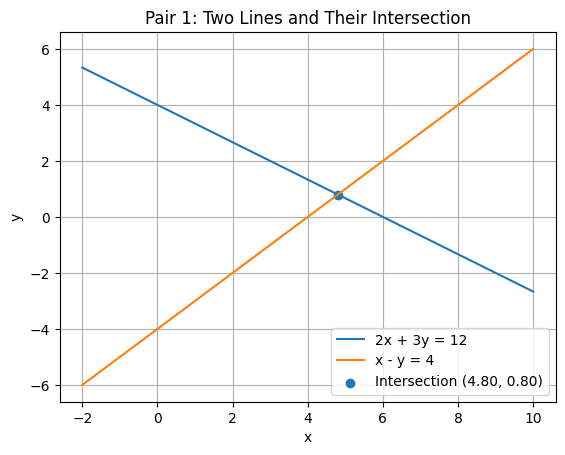

In [81]:
plt.figure()
plt.plot(x_vals, y1, label="2x + 3y = 12")
plt.plot(x_vals, y2, label="x - y = 4")
plt.scatter([xi], [yi], label=f"Intersection ({xi:.2f}, {yi:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Pair 1: Two Lines and Their Intersection")
plt.legend()
plt.grid(True)
plt.show()

## **Example-2: solution, step-by-step, and Python implementation**

$$
\begin{cases}
3x + 2y = 18 \quad (1)\\
2x - y = 5 \quad (2)
\end{cases}
$$

## Step-by-step (algebra)

From (2): $y = 2x - 5$.

Substitute in (1):

$$
3x + 2(2x-5) = 18 \;\Rightarrow\; 3x + 4x - 10 = 18 \;\Rightarrow\; 7x = 28 \;\Rightarrow\; x = 4.
$$

Then $y = 2(4) - 5 = 3$.

**Solution:** $\boxed{x=4,\; y=3}$.

**Check:**
(1) $3(4)+2(3)=12+6=18$ ✓
(2) $2(4)-3=8-3=5$ ✓

---

## NumPy + Matplotlib implementation (already executed above)

* Solved the system $AX=b$ with:

  $$
  A=\begin{bmatrix}3&2\\2&-1\end{bmatrix},\quad b=\begin{bmatrix}18\\5\end{bmatrix}
  $$
* Computed intersection $(4,3)$.
* Plotted both lines $3x+2y=18$ and $2x-y=5$ plus their intersection.


In [82]:
# Solve Example 2 with NumPy and plot both lines with their intersection using Matplotlib

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction


In [83]:
# System:
# 3x + 2y = 18
# 2x - y = 5

# 1) Solve using NumPy (Ax = b)
A = np.array([[3.0, 2.0],
              [2.0, -1.0]])
b = np.array([18.0, 5.0])

x_sol, y_sol = np.linalg.solve(A, b)

print(f"Solution (decimal): x = {x_sol}, y = {y_sol}")
print("Solution (fractions):",
      f"x = {Fraction(x_sol).limit_denominator()},",
      f"y = {Fraction(y_sol).limit_denominator()}")


Solution (decimal): x = 4.0, y = 3.0000000000000004
Solution (fractions): x = 4, y = 3


In [84]:
# 2) Plot both lines and their intersection
# From equations:
# 3x + 2y = 18  -> y = (18 - 3x)/2
# 2x - y  = 5   -> y = 2x - 5

x_vals = np.linspace(-2, 10, 400)
y1 = (18 - 3*x_vals) / 2
y2 = 2*x_vals - 5


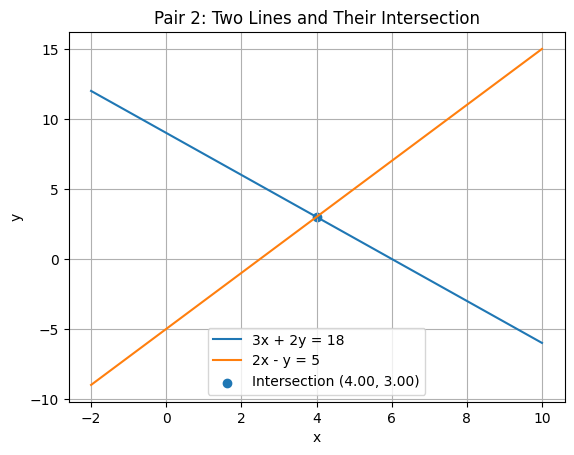

In [85]:
plt.figure()
plt.plot(x_vals, y1, label="3x + 2y = 18")
plt.plot(x_vals, y2, label="2x - y = 5")
plt.scatter([x_sol], [y_sol], label=f"Intersection ({x_sol:.2f}, {y_sol:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Pair 2: Two Lines and Their Intersection")
plt.legend()
plt.grid(True)
plt.show()

# Example-3: solution, step-by-step, and Python implementation

## Step-by-step (algebraic)

System:

$$
\begin{cases}
7x + 2y = 29 \quad(1)\\[4pt]
5x - y = 14 \quad(2)
\end{cases}
$$

From equation (2): $y = 5x - 14$.

Substitute into (1):

$$
7x + 2(5x - 14) = 29
$$

$$
7x + 10x - 28 = 29
$$

$$
17x - 28 = 29 \;\Rightarrow\; 17x = 57 \;\Rightarrow\; x = \frac{57}{17}.
$$

Then

$$
y = 5x - 14 = 5\left(\frac{57}{17}\right) - 14 = \frac{285-238}{17} = \frac{47}{17}.
$$

**Final answer (exact):** $\displaystyle x=\frac{57}{17},\; y=\frac{47}{17}.$
**Decimal approx:** $x\approx 3.3529411765,\; y\approx 2.7647058824.$

Quick check:

* $7\cdot\frac{57}{17} + 2\cdot\frac{47}{17} = \frac{399+94}{17}=\frac{493}{17}=29$. ✓
* $5\cdot\frac{57}{17} - \frac{47}{17} = \frac{285-47}{17}=\frac{238}{17}=14$. ✓


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

In [87]:
# Equations:
# 7x + 2y = 29  -> y = (29 - 7x)/2
# 5x - y = 14   -> y = 5x - 14

A = np.array([[7.0, 2.0],
              [5.0, -1.0]])
b = np.array([29.0, 14.0])

x_sol, y_sol = np.linalg.solve(A, b)
print(f"x = {x_sol}  y = {y_sol}")
print("As fractions:", Fraction(x_sol).limit_denominator(), Fraction(y_sol).limit_denominator())


x = 3.3529411764705883  y = 2.7647058823529402
As fractions: 57/17 47/17


In [88]:
# Plot
x_vals = np.linspace(x_sol - 5, x_sol + 5, 400)
y1 = (29 - 7*x_vals) / 2
y2 = 5*x_vals - 14

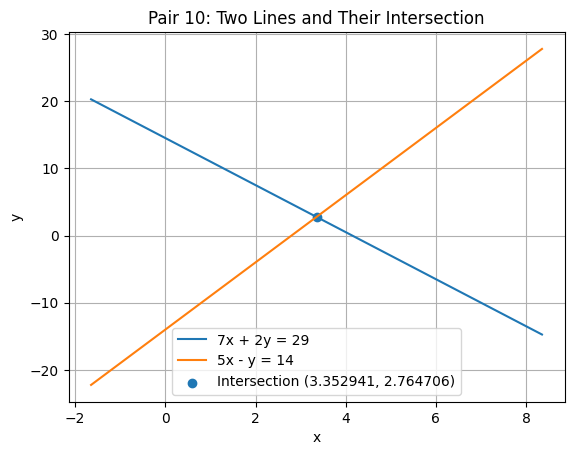

In [89]:
plt.figure()
plt.plot(x_vals, y1, label="7x + 2y = 29")
plt.plot(x_vals, y2, label="5x - y = 14")
plt.scatter([x_sol], [y_sol], label=f"Intersection ({x_sol:.6f}, {y_sol:.6f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Pair 10: Two Lines and Their Intersection")
plt.legend()
plt.grid(True)
plt.show()

# **Thank You!!!**